In [43]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from dataclasses import field, asdict, dataclass
from typing import List
from benchmarks.benchmark_utils import RequestFuncOutput

In [45]:
def retrive_request_outputs(path):
    with open(path, 'r') as file:
        data = json.load(file)
        outputs = [RequestFuncOutput(**d) for d in data]
    return outputs

In [54]:
def lat_tpot_ttft(outputs):
    lats = [o.request_latency for o in outputs if o.request_latency]
    tpots = [o.tpot for o in outputs if o.tpot]
    ttfts = [o.ttft for o in outputs if o.ttft]
    lat_p50, lat_p90, lat_p99 = np.percentile(lats, [50, 90, 99])
    tpot_p50, tpot_p90, tpot_p99 = np.percentile(tpots, [50, 90, 99])
    ttft_p50, ttft_p90, ttft_p99 = np.percentile(ttfts, [50, 90, 99])
    
    print(f"Num finished: {len([o for o in outputs if o.success])}")
    print(f'Latency: p50={lat_p50:.2f}, p90={lat_p90:.2f}, p99={lat_p99:.2f}')
    print(f'TPOT: p50={tpot_p50:.2f}, p90={tpot_p90:.2f}, p99={tpot_p99:.2f}')
    print(f'TTFT: p50={ttft_p50:.2f}, p90={ttft_p90:.2f}, p99={ttft_p99:.2f}')
    
    fig, axs = plt.subplots(1,3, figsize=(16, 4))
    sns.kdeplot(x=lats,  ax=axs[0], cumulative=True).set_title('Latency')
    sns.kdeplot(x=tpots, ax=axs[1], cumulative=True).set_title('TPOT')
    sns.kdeplot(x=ttfts, ax=axs[2], cumulative=True).set_title('TTFT')
    
def ttft_slo(outputs, slo):
    ttfts = [o.ttft for o in outputs if o.ttft]
    slo_ttfts = [1 for ttft in ttfts if ttft <= slo]
    return sum(slo_ttfts) / len(ttfts)

In [9]:
outputs = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/new_equation_sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.RANDOM-None-4r.json')

Num finished: 5272
Latency: p50=22.69, p90=32.73, p99=36.93
TPOT: p50=0.25, p90=0.40, p99=0.44
TTFT: p50=6.10, p90=8.90, p99=13.53


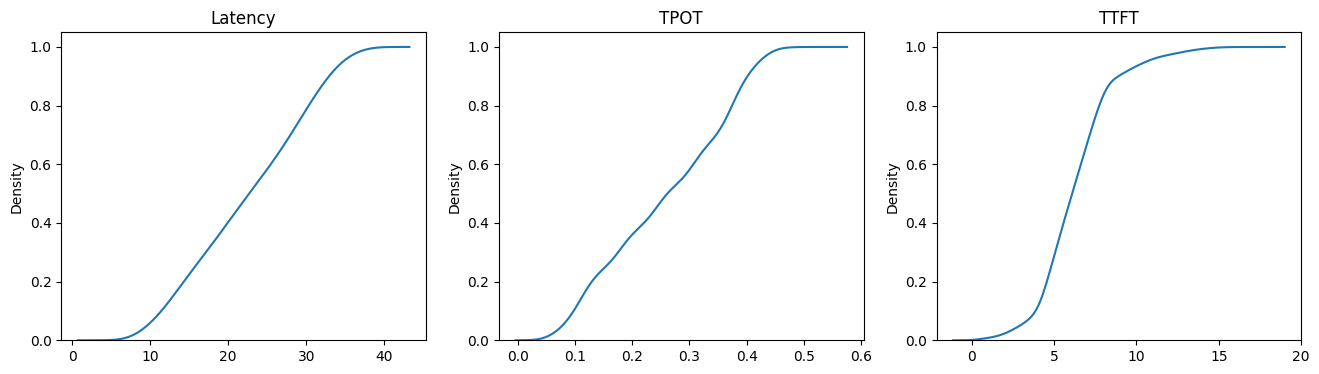

In [10]:
lat_tpot_ttft([o for o in outputs if o.prompt_text.startswith('Workload ') and o.success])

Num finished: 3073
Latency: p50=34.66, p90=111.09, p99=277.36
TPOT: p50=0.24, p90=0.37, p99=0.44
TTFT: p50=18.93, p90=94.97, p99=263.88


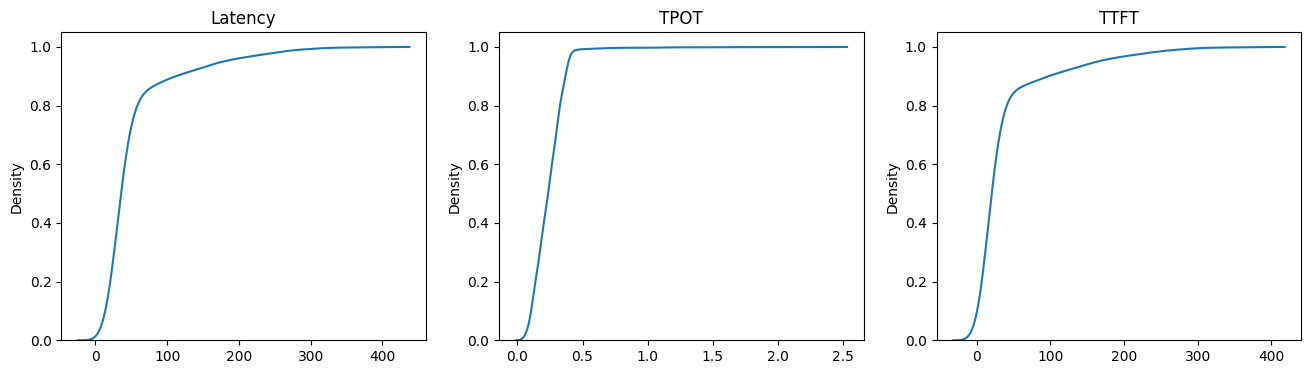

In [11]:
lat_tpot_ttft([o for o in outputs if not o.prompt_text.startswith('Workload ') and o.success])

Num finished: 8345
Latency: p50=26.13, p90=46.88, p99=240.03
TPOT: p50=0.25, p90=0.38, p99=0.44
TTFT: p50=7.25, p90=31.07, p99=222.37


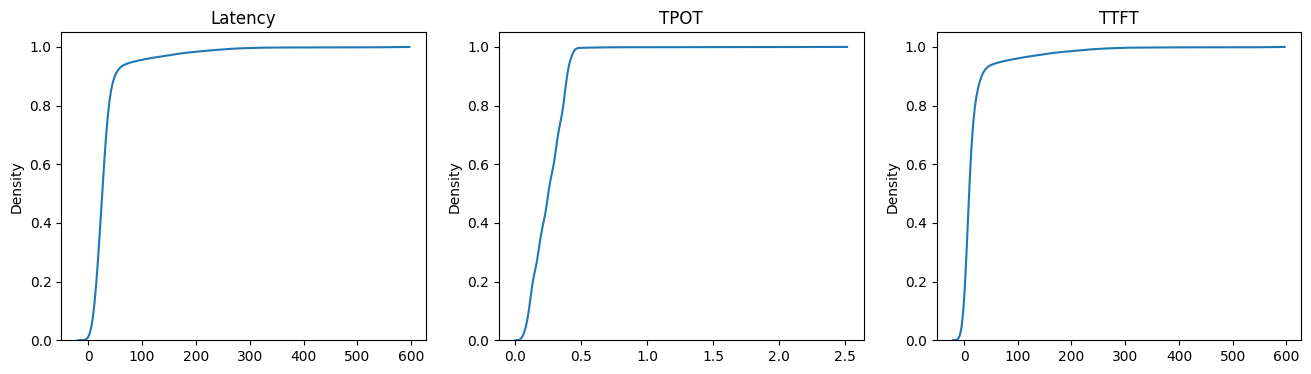

In [12]:
lat_tpot_ttft(outputs)

In [13]:
oracle_outputs = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/new_equation_sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.CUSTOM-CustomPolicyType.ORACLE-4r.json')


Num finished: 9483
Latency: p50=23.63, p90=35.96, p99=246.46
TPOT: p50=0.24, p90=0.39, p99=0.59
TTFT: p50=6.64, p90=16.29, p99=235.93


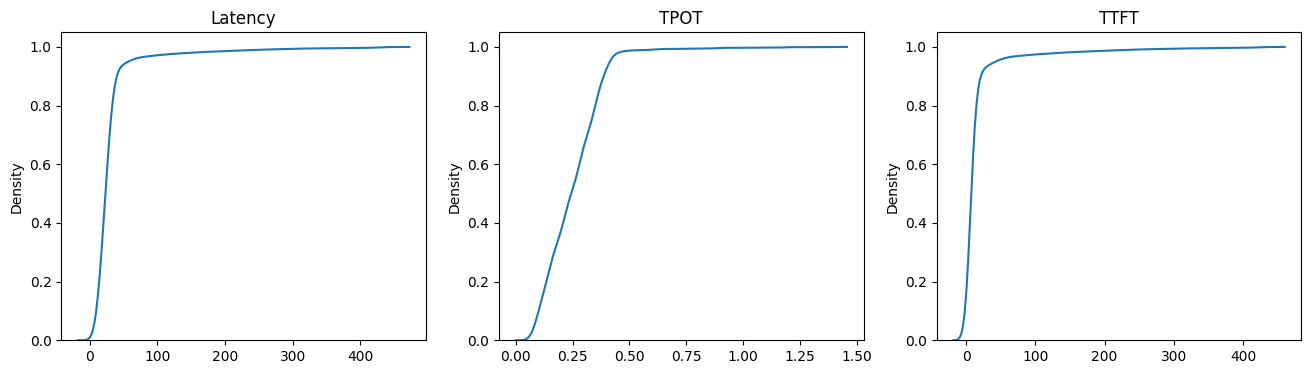

In [14]:
lat_tpot_ttft(oracle_outputs)

Num finished: 4343
Latency: p50=26.87, p90=60.39, p99=351.28
TPOT: p50=0.24, p90=0.35, p99=0.62
TTFT: p50=9.28, p90=45.40, p99=333.52


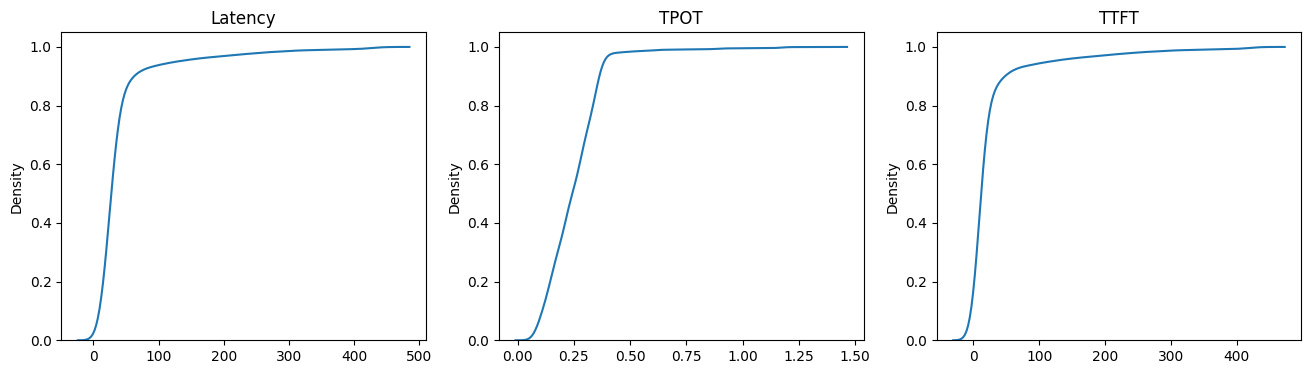

In [41]:
lat_tpot_ttft([o for o in oracle_outputs if not o.prompt_text.startswith('Workload ')])

In [47]:
hc_2h_2c = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/new_equation_sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.CUSTOM-CustomPolicyType.ORACLE_HOT_COLD-4r_2h_2c.json')

Num finished: 9187
Latency: p50=6.07, p90=34.48, p99=148.89
TPOT: p50=0.08, p90=0.39, p99=0.45
TTFT: p50=0.56, p90=11.36, p99=134.15


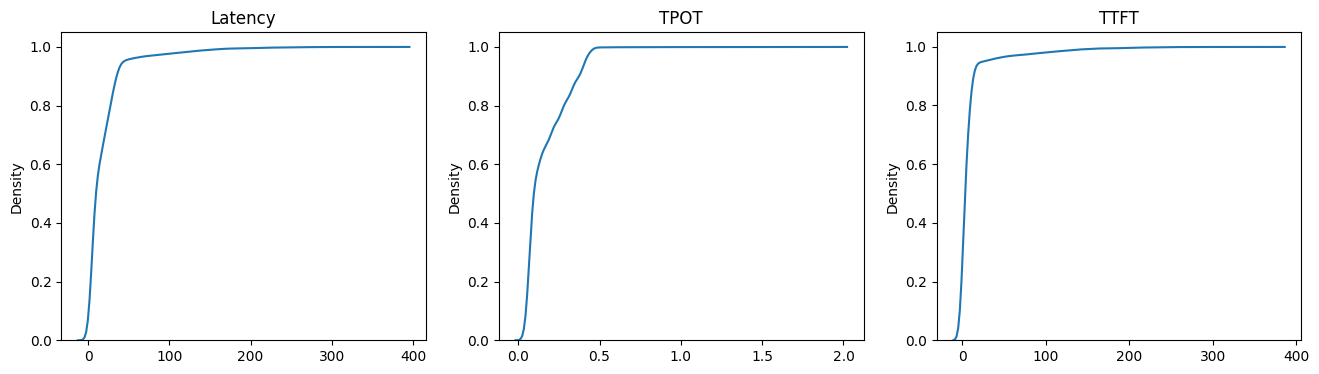

In [17]:
lat_tpot_ttft(hc_2h_2c)

In [59]:
ttft_slo(hc_2h_2c, 8)

0.7883017259748561

Num finished: 3883
Latency: p50=25.79, p90=48.42, p99=199.99
TPOT: p50=0.27, p90=0.40, p99=0.45
TTFT: p50=7.84, p90=33.87, p99=185.13


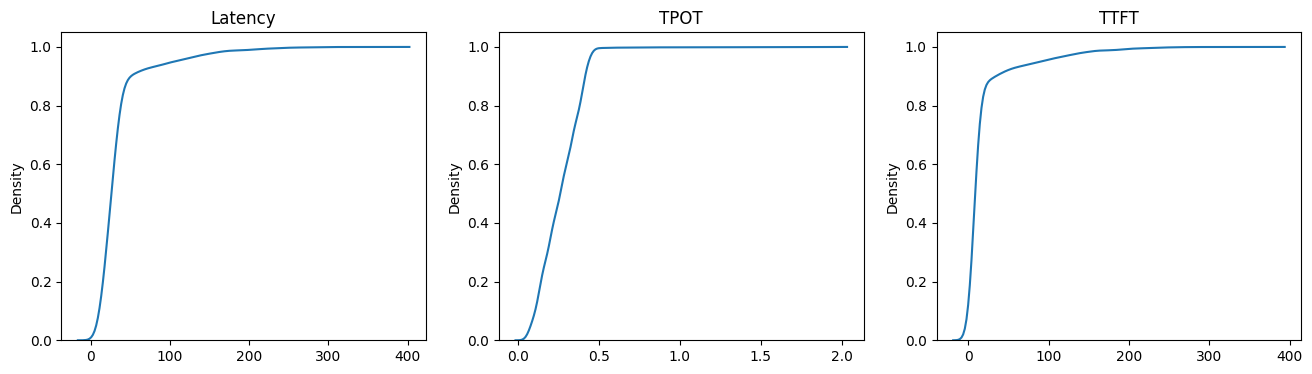

In [48]:
lat_tpot_ttft([o for o in hc_2h_2c if not o.prompt_text.startswith('Workload ')])

In [49]:
hc_1h_3c = retrive_request_outputs('/mnt/ssd1/alm-os/sglang_multi_model/logs/new_equation_sim_hot_cold_rps18_600/details-DataParallelRuntimeSelectionPolicy.CUSTOM-CustomPolicyType.ORACLE_HOT_COLD-4r_1h_3c.json')

In [60]:
ttft_slo(hc_1h_3c, 8)

0.7938706015891033

Num finished: 3340
Latency: p50=25.27, p90=37.94, p99=274.36
TPOT: p50=0.28, p90=0.37, p99=0.44
TTFT: p50=8.04, p90=20.14, p99=254.52


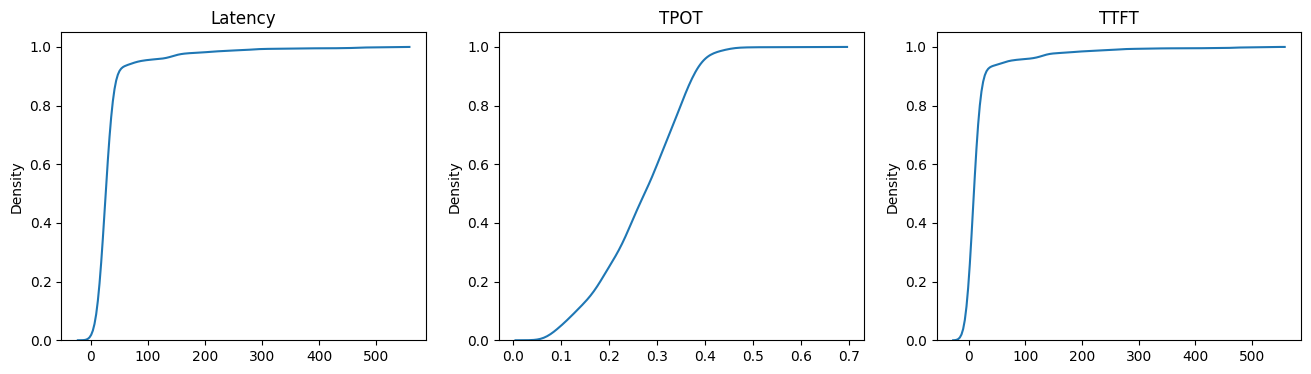

In [61]:
lat_tpot_ttft([o for o in hc_1h_3c if o.prompt_text.startswith('Workload ')])

Num finished: 8740
Latency: p50=22.40, p90=32.67, p99=151.20
TPOT: p50=0.28, p90=0.42, p99=0.46
TTFT: p50=2.07, p90=12.38, p99=134.26


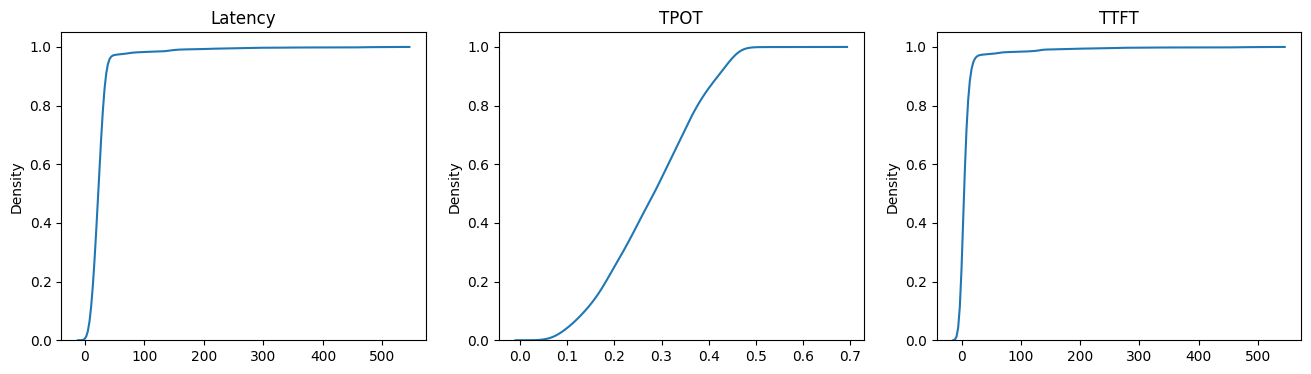

In [33]:
lat_tpot_ttft(hc_1h_3c)